# Importing Pandas for Data Handling

In [1]:
import pandas as pd

# Loading our Dataset

In [2]:
dataset = pd.read_csv('census_data.csv')

In [3]:
dataset.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Identifying unique values in our Label Column

In [4]:
dataset['income_bracket'].unique()

array([' <=50K', ' >50K'], dtype=object)

# Utility Function

In [5]:
def label_fix(label):
    if label==' <=50K':
        return 0
    else:
        return 1

In [6]:
dataset['income_bracket'] = dataset['income_bracket'].apply(label_fix)

# Input Data

In [7]:
X = dataset.drop('income_bracket', axis=1)

In [8]:
X.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


# Output Labels

In [9]:
y = dataset['income_bracket']

In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income_bracket, dtype: int64

# Performing the Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
dataset.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_bracket'],
      dtype='object')

# Importing Tensorflow

In [14]:
import tensorflow as tf

C:\Users\Eshban\Anaconda3\envs\100daysofmlcode\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Adjusting Non-numeric Values 

In [15]:
gender = tf.feature_column.categorical_column_with_vocabulary_list("gender", ["Female", "Male"])
occupation = tf.feature_column.categorical_column_with_hash_bucket("occupation", hash_bucket_size=1000)
marital_status = tf.feature_column.categorical_column_with_hash_bucket("marital_status", hash_bucket_size=1000)
relationship = tf.feature_column.categorical_column_with_hash_bucket("relationship", hash_bucket_size=1000)
education = tf.feature_column.categorical_column_with_hash_bucket("education", hash_bucket_size=1000)
workclass = tf.feature_column.categorical_column_with_hash_bucket("workclass", hash_bucket_size=1000)
native_country = tf.feature_column.categorical_column_with_hash_bucket("native_country", hash_bucket_size=1000)

# Adjusting Numeric Values

In [16]:
age = tf.feature_column.numeric_column("age")
education_num = tf.feature_column.numeric_column("education_num")
capital_gain = tf.feature_column.numeric_column("capital_gain")
capital_loss = tf.feature_column.numeric_column("capital_loss")
hours_per_week = tf.feature_column.numeric_column("hours_per_week")

# Adjusted Feature Columns

In [17]:
feat_cols = [gender,occupation,marital_status,relationship,education,workclass,native_country,
            age,education_num,capital_gain,capital_loss,hours_per_week]

# Input Function

In [18]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=100,num_epochs=None,shuffle=True)

# Importing Matplotlib for Data Visualisation

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

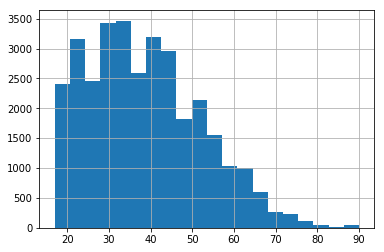

In [20]:
dataset['age'].hist(bins=20)

In [21]:
dataset.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income_bracket    32561 non-null int64
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


# Instantiating our Linear Classifier

In [23]:
classifier = tf.estimator.LinearClassifier(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Eshban\\AppData\\Local\\Temp\\tmp14dp5yz8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B00DF9AC88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Training our Classifier

In [24]:
classifier.train(input_fn=input_func, steps=6000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Eshban\AppData\Local\Temp\tmp14dp5yz8\model.ckpt.
INFO:tensorflow:loss = 69.31474, step = 1
INFO:tensorflow:global_step/sec: 106.103
INFO:tensorflow:loss = 173.67447, step = 101 (0.947 sec)
INFO:tensorflow:global_step/sec: 211.089
INFO:tensorflow:loss = 79.830795, step = 201 (0.475 sec)
INFO:tensorflow:global_step/sec: 212.883
INFO:tensorflow:loss = 381.95166, step = 301 (0.471 sec)
INFO:tensorflow:global_step/sec: 209.326
INFO:tensorflow:loss = 313.46432, step = 401 (0.477 sec)
INFO:tensorflow:global_step/sec: 212.431
INFO:tensorflow:loss = 184.56537, step = 501 (0.471 sec)
INFO:tensorflow:global_step/sec: 209.326
INFO:tensorflow:loss = 98.90117, step = 601 (0.478 sec)
INFO:tensorflow:global_step/s

# Prediction Input Function

In [25]:
prediction_function = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=len(X_test), shuffle=False)

In [26]:
predictions = list(classifier.predict(input_fn=prediction_function))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Eshban\AppData\Local\Temp\tmp14dp5yz8\model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [27]:
predictions[0]

{'logits': array([-0.8309303], dtype=float32),
 'logistic': array([0.3034484], dtype=float32),
 'probabilities': array([0.6965516, 0.3034484], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object)}

# Final Predictions

In [28]:
final_predictions = []

for pred in predictions:
    final_predictions.append(pred['class_ids'][0])

In [29]:
final_predictions[:10]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

# Classification Report

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test, final_predictions))

             precision    recall  f1-score   support

          0       0.90      0.90      0.90      7436
          1       0.68      0.67      0.68      2333

avg / total       0.85      0.85      0.85      9769

